In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [3]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [7]:
# 1 Make a Hist
agehist = thinkstats2.Hist(df['Age'], label = 'Age')
agehist

Hist({29: 660, 28: 649, 27: 584, 26: 583, 25: 547, 24: 523, 21: 505, 23: 503, 18: 476, 22: 470, 32: 470, 30: 467, 19: 465, 31: 458, 33: 454, 20: 454, 34: 426, 17: 395, 35: 386, 36: 363, 38: 346, 16: 338, 37: 336, 39: 323, 51: 314, 40: 312, 41: 312, 47: 310, 45: 310, 42: 309, 55: 307, 50: 306, 48: 303, 53: 300, 49: 297, 52: 294, 46: 293, 44: 290, 43: 284, 54: 270}, 'Age')

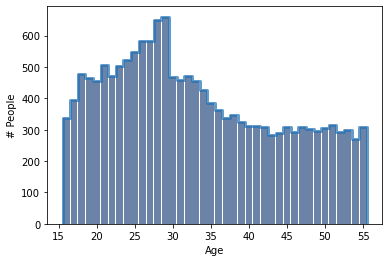

In [8]:
# 1 Plot Hist and Pmf for Age
thinkplot.Hist
thinkplot.Config(xlabel = 'Age', ylabel = '# People')
thinkplot.Hist(agehist)
thinkplot.pmf(agehist)

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [38]:
from itertools import count

# Extract "Age" variable
ages = df['Age']

count = 0
for age in ages:
    if age == 51:
        count += 1

result = 100.0 * count / len(ages)
print('Fraction of the people who are 51 YO: %.1f ' %result,'%')

count = 0
for age in ages:
    if age > 51:
        count += 1

result = 100.0 * count / len(ages)
print('Fraction of the people who are older 51 YO: %.1f' %result,'%')


Fraction of the people who are 51 YO: 2.0  %
Fraction of the people who are older 51 YO: 7.3 %


##### What is the median age?

In [44]:
print('The median age for the sample data is : %.1f' %np.mean(ages), 'YO')


The median age for the sample data is : 33.2 YO


##### Does the distribution of the sample data seem to mirror the working age population?

The distribution is slightly tilted to the left showing a larger number of workers in the range of 18 to 30 years than in the range of 31 to 55, it would be expected that the ranges would be a little more balanced (showing a more normal shaped distribution). since the percentage of the population of workers in the US it is similar for both ranges.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [75]:
educations = df['Eduacation']
print(round(educations.value_counts('HighSchool'),2))


HighSchool            0.39
LessThanHighSchool    0.30
Intermediate          0.17
graduate              0.09
PostGraduate          0.06
Name: Eduacation, dtype: float64


In [77]:
races = df['Race']
print(round(races.value_counts('black'),2))


NotBlack    0.93
black       0.07
Name: Race, dtype: float64


In [80]:
hisps = df['Hisp']
print(round(hisps.value_counts('Hisp'),2))


NotHispanic    0.93
hispanic       0.07
Name: Hisp, dtype: float64


##### Demographic Conclusion


The sample data does not appear to be representative of the US population. For instance in the data sample, the "Education" variable shows a level of education of 39% (High School) which is way below 90% that shows in 2020 census consulted, in terms of "Race", only there are 7% of data marked as 'black race' in the sample compared with 12%, and for "Hispanic" 7% in the sample vs 18%.

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

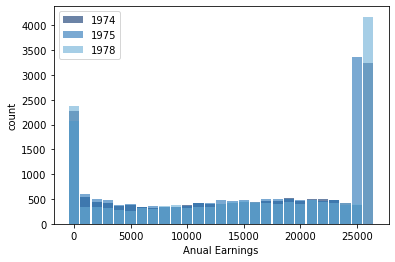

In [113]:
# Take earnings column
e74 = df["Earnings_1974"]
e75 = df["Earnings_1975"]
e78 = df["Earnings_1978"]

# Histograms
e74hist = thinkstats2.Hist(round(e74,-3), label = '1974')
e75hist = thinkstats2.Hist(round(e75,-3), label = '1975')
e78hist = thinkstats2.Hist(round(e78,-3), label = '1978')

thinkplot.preplot(3)
thinkplot.Hist(e74hist)
thinkplot.Hist(e75hist)
thinkplot.Hist(e78hist)
thinkplot.Config(xlabel='Anual Earnings', ylabel='count')


# 1.Conclusion
The graphic allows us to deduce that the majority of people made an average of roughly $25,000 per year, which is the greatest range of wages for those three years. The number of persons in the $25,000 range increased significantly in 1978.



In [102]:
# 2.Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 

df78nb = df[df["Race"] == "NotBlack"]
df78b = df[df["Race"] == "black"]
print(df78nb["Earnings_1978"].mean())
print(df78b["Earnings_1978"].mean())


15072.07899151205
12006.68295142261


In [103]:
df78h = df[df["Hisp"] == "NotHispanic"]
df78nh = df[df["Hisp"] == "hispanic"]
print(df78h["Earnings_1978"].mean())
print(df78nh["Earnings_1978"].mean())

14959.218905804977
13396.677887994774


In [105]:
df78m = df[df["MaritalStatus"] == "Married"]
df78nm = df[df["MaritalStatus"] == "NotMarried"]
print(df78m["Earnings_1978"].mean())
print(df78nm["Earnings_1978"].mean())

16390.997167012894
11033.720549714462


In [106]:
df78nd1 = df[df["Nodeg"] == 1]
df78nd0 = df[df["Nodeg"] == 0]
print(df78nd1["Earnings_1978"].mean())
print(df78nd0["Earnings_1978"].mean())

12585.205679044797
15796.747484376683


The major influence in earnings for 1978 is found when we evaluate the MaritalStatus variable, where people not married wich the average earnings was 11k while for married people the average earning was 16k, a diffence of 5k between both groups.


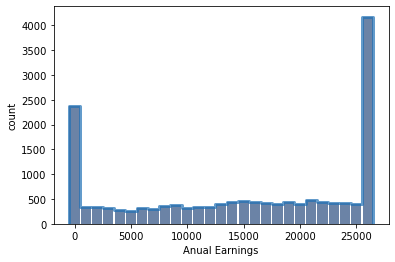

In [110]:
#3 .Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value.
thinkplot.Hist
thinkplot.Config(xlabel='Anual Earnings', ylabel='count')
thinkplot.Hist(e78hist)
thinkplot.pmf(e78hist)


In [111]:
e78.describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [128]:
# Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
# What can you infer from the presence of outliers that may impact analysis of this data.

df78max = df[df["Earnings_1978"] >= 25000]
df78min = df[df["Earnings_1978"] == 0]
print(df78max["Earnings_1978"].count())
print(df78min["Earnings_1978"].count())

4363
2172


As we can see in the 1978 earnings sample, there are two groups of data that impact the analysis, people with earning 25k o more wich represents 26% of the total of sample, and  people reporting zero income with 14% of the total of sample. However, in my opinion, they should not be considered outliers because seems to be normal values for the analysis of earnings.

##### What to Investigate Further


##### Histogram and PMF

In [6]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions
